In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use("science")
import numpy as np

from neutrons.data_processor import CrossSectionProcessor


H_data_a = pd.read_csv('../data/h_cross_a.txt',sep='\s+')
H_data_t = pd.read_csv('../data/h_cross_t.txt',sep='\s+')
H_data_s = pd.read_csv('../data/h_cross_s.txt',sep='\s+')

O_data_a = pd.read_csv('../data/o_cross_a.txt',sep='\s+')
O_data_t = pd.read_csv('../data/o_cross_t.txt',sep='\s+')
O_data_s = pd.read_csv('../data/o_cross_s.txt',sep='\s+')

In [42]:
processor = CrossSectionProcessor([H_data_t, O_data_t])
f = processor.interpolaters[0]

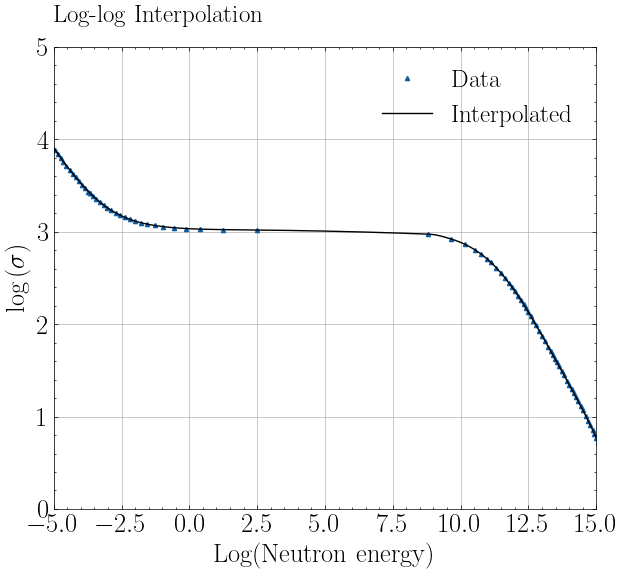

In [43]:
xp = H_data_t["energy(eV)"].values
fp = H_data_t["sigma_t(b)"].values

x_log = np.log(xp)
y_log = np.log(fp)

x_interp = np.linspace(min(x_log), max(x_log), 10000)
y_interp = f(x_interp)

plt.figure(figsize=(7, 6))
plt.plot(x_log, y_log, '^',markersize = 3, label="Data")
plt.plot(x_interp, y_interp, 'k-', label="Interpolated")
plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
plt.xlabel('Log(Neutron energy)', fontsize=19)
plt.ylabel(r'$\log{(\sigma)}$', fontsize=19)
plt.legend(fontsize=18)
plt.title('Log-log Interpolation', fontsize=18, pad=18, loc = 'left')
plt.xlim(-5, 15)
plt.ylim(0, 5)
plt.grid(True)
plt.show()

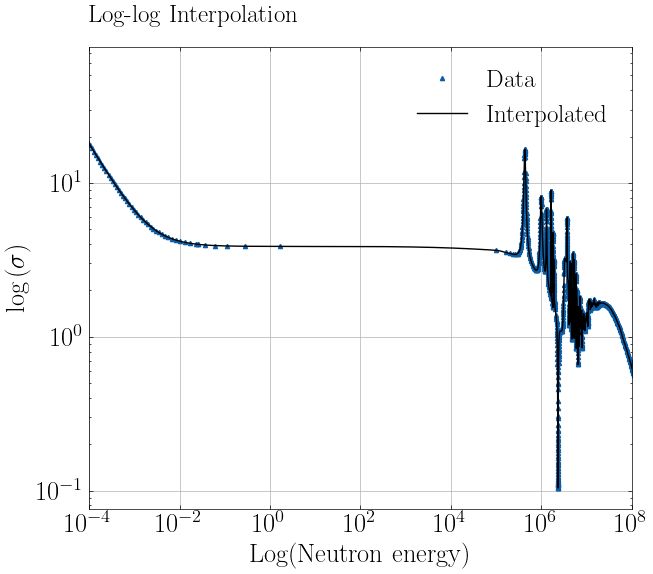

In [44]:
xp = O_data_t["energy(eV)"].values
fp = O_data_t["sigma_t(b)"].values

x_log = np.log(xp)
y_log = np.log(fp)

f = processor.interpolaters[1]
x_interp = np.linspace(min(x_log), max(x_log), 10000000)
y_interp_log = f(x_interp)
y_interp = np.exp(y_interp_log)

plt.figure(figsize=(7, 6))
plt.loglog(xp, fp, '^', markersize=3, label="Data")
plt.loglog(np.exp(x_interp), y_interp, 'k-', label="Interpolated")
plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
plt.xlabel('Log(Neutron energy)', fontsize=19)
plt.ylabel(r'$\log{(\sigma)}$', fontsize=19)
plt.xlim(10**-4, 10**8)
plt.legend(fontsize=18)
plt.title('Log-log Interpolation', fontsize=18, pad=18, loc = 'left')
plt.grid(True)
plt.show()

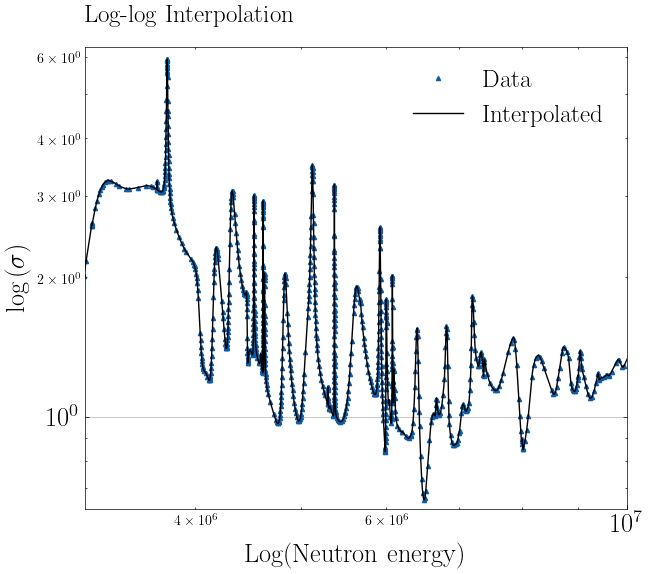

In [45]:
plt.figure(figsize=(7, 6))
plt.loglog(xp, fp, '^', markersize=3, label="Data")
plt.loglog(np.exp(x_interp), y_interp, 'k-', label="Interpolated")
plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
plt.xlabel('Log(Neutron energy)', fontsize=19)
plt.ylabel(r'$\log{(\sigma)}$', fontsize=19)
plt.legend(fontsize=18)
plt.xlim(10**6.5, 10**7)
plt.ylim(10**-0.2, 10**0.8)
plt.title('Log-log Interpolation', fontsize=18, pad=18, loc = 'left')
plt.grid(True)
plt.show()

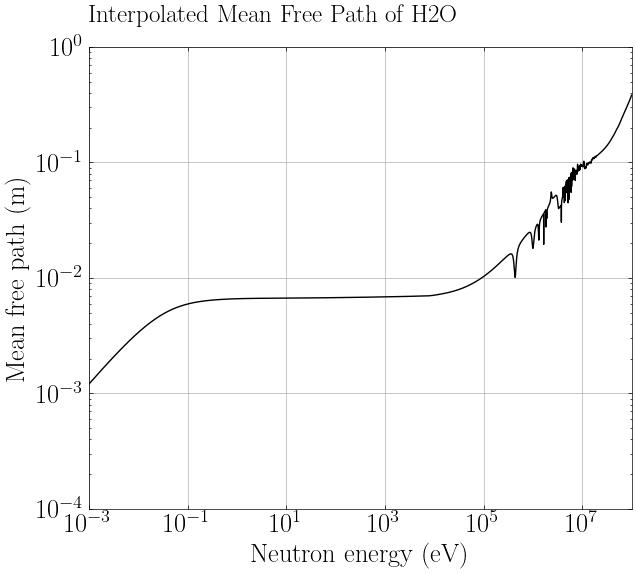

In [51]:
energies = np.logspace(-4, 8, 100000)
mfps=[processor.get_mfp(E) for E in energies]
plt.figure(figsize=(7, 6))
plt.loglog(energies, mfps, 'k-')
plt.xlim(10**-3.5, 10**8)
plt.ylim(10**-4, 1)
plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
plt.xlabel('Neutron energy (eV)', fontsize=19)
plt.ylabel('Mean free path (m)', fontsize=19)
plt.title('Interpolated Mean Free Path of H2O', fontsize=18, pad=18, loc = 'left')
plt.grid(True)
plt.show()